In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
rainfall_data = pd.read_csv(r"C:\Users\ASUS\Downloads\rainfall_area-wt_India_1901-2015.csv")

In [51]:
print(rainfall_data.head())

  REGION  YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP  \
0  INDIA  1901  34.7  37.7  18.0  39.3  50.8  113.4  242.2  272.9  124.4   
1  INDIA  1902   7.4   4.3  19.0  43.5  48.3  108.8  284.0  199.7  201.5   
2  INDIA  1903  17.0   8.3  31.3  17.1  59.5  118.3  297.0  270.4  199.1   
3  INDIA  1904  14.4   9.6  31.8  33.1  72.4  164.8  261.0  206.4  129.6   
4  INDIA  1905  25.3  20.9  42.7  33.7  55.7   93.3  252.8  200.8  178.4   

     OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0   52.7  38.0   8.3  1032.3     72.4    108.1    752.8     99.0  
1   61.5  27.9  24.4  1030.2     11.7    110.8    794.0    113.8  
2  117.9  36.9  17.7  1190.5     25.3    107.9    884.8    172.5  
3   69.0  11.2  16.3  1019.8     24.0    137.4    761.8     96.6  
4   51.4   9.7  10.5   975.3     46.2    132.2    725.4     71.6  


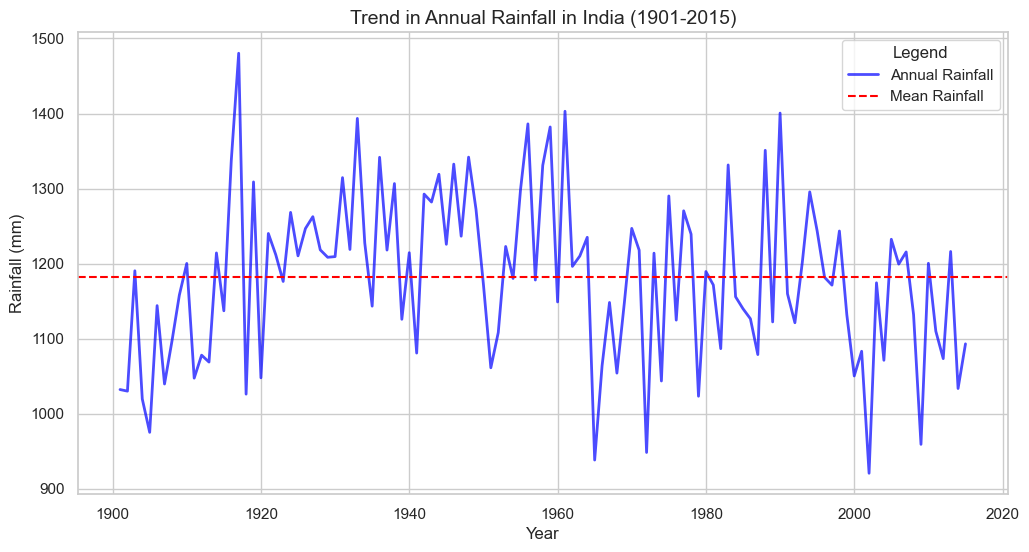

In [52]:
annual_rainfall = rainfall_data[['YEAR', 'ANNUAL']]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(annual_rainfall['YEAR'], annual_rainfall['ANNUAL'], 
         label='Annual Rainfall', color='blue', linewidth=2, alpha=0.7)

mean_value = annual_rainfall['ANNUAL'].mean()
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean Rainfall')

plt.title('Trend in Annual Rainfall in India (1901-2015)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Legend')

plt.show()
                   

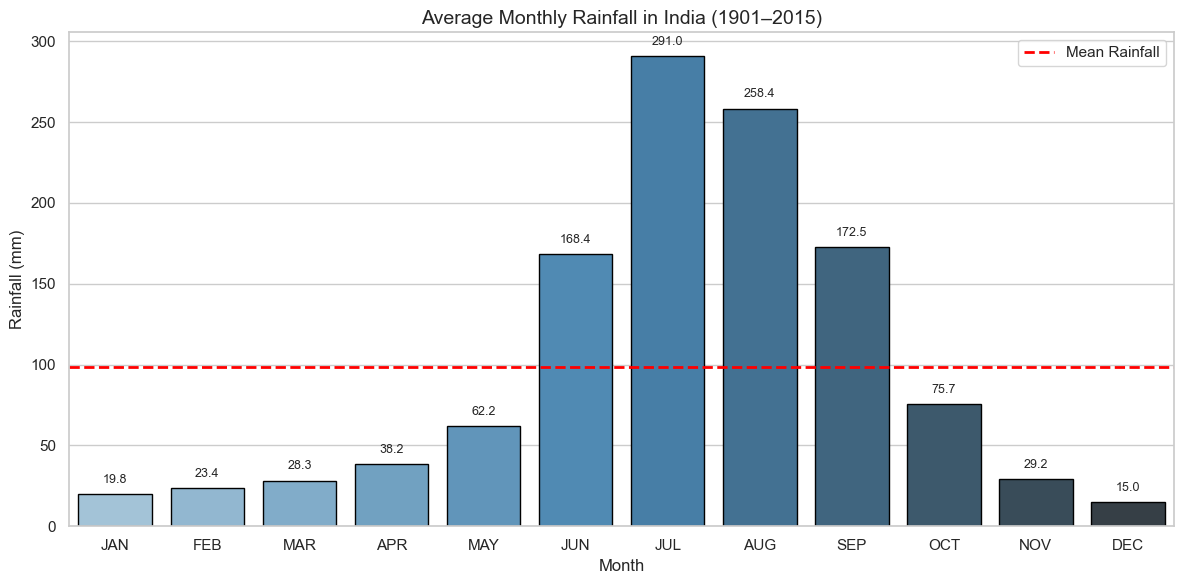

In [53]:
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                   'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_avg = rainfall_data[monthly_columns].mean()

highest_rainfall_month = monthly_avg.idxmax()
lowest_rainfall_month = monthly_avg.idxmin()
mean_monthly_rainfall = monthly_avg.mean()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='Blues_d', edgecolor='black')

for idx, value in enumerate(monthly_avg.values):
    plt.text(idx, value + 5, f"{value:.1f}", ha='center', va='bottom', fontsize=9)

plt.axhline(y=mean_monthly_rainfall, color='red', linestyle='--', linewidth=2, label='Mean Rainfall')

plt.title('Average Monthly Rainfall in India (1901–2015)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.legend()

plt.tight_layout()
plt.show()


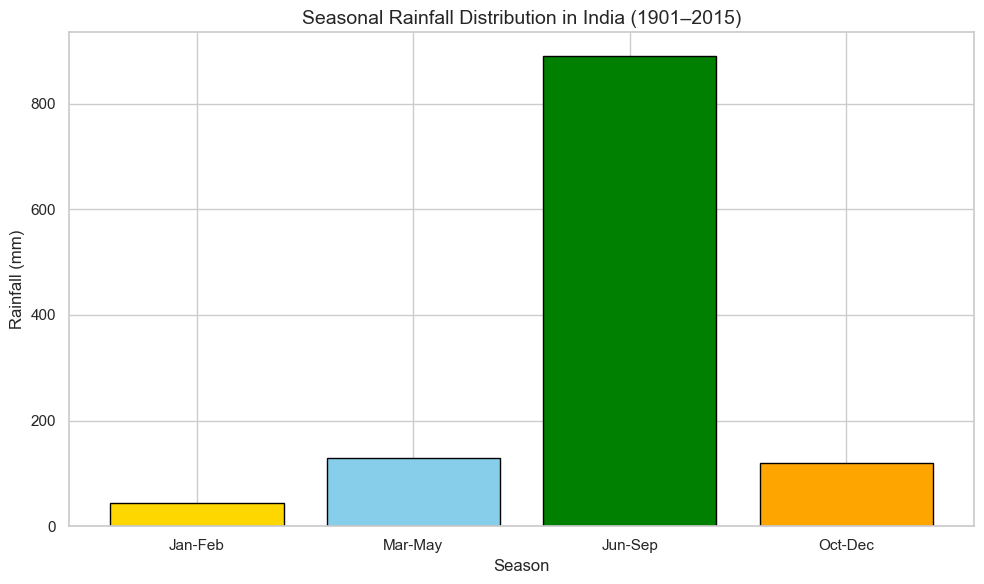

In [54]:
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_avg = rainfall_data[seasonal_columns].mean()

colors = ['gold', 'skyblue', 'green', 'orange']
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_avg.index, seasonal_avg.values, color=colors, edgecolor='black')

plt.title('Seasonal Rainfall Distribution in India (1901–2015)', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Rainfall (mm)')

plt.tight_layout()
plt.show()

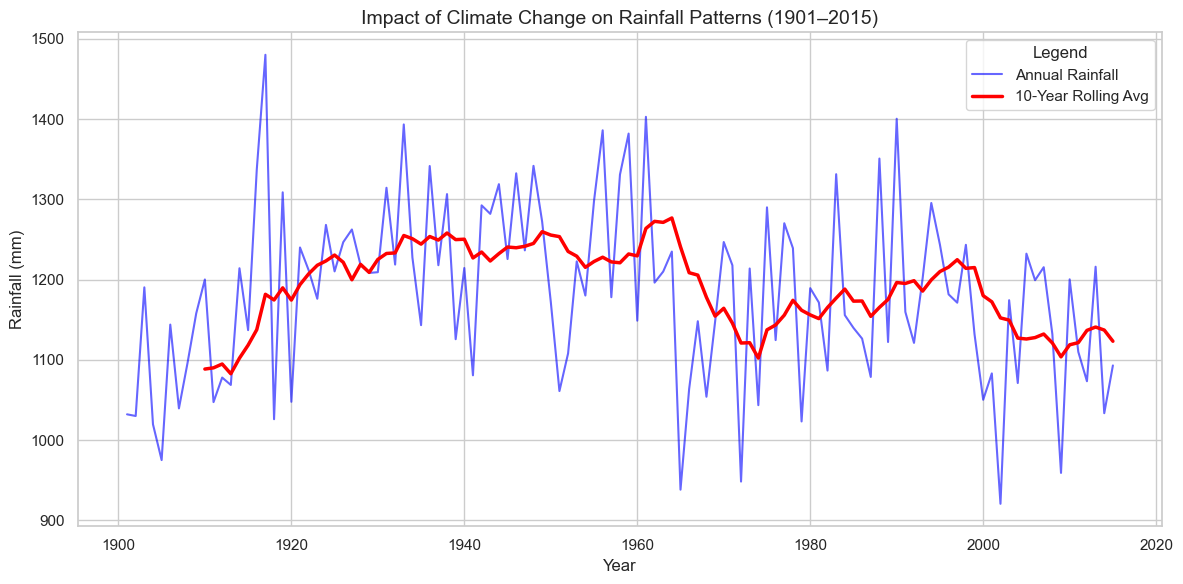

In [55]:
rainfall_data['10-Year Rolling Avg'] = rainfall_data['ANNUAL'].rolling(window=10).mean()
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
plt.plot(rainfall_data['YEAR'],rainfall_data['ANNUAL'],label='Annual Rainfall',color='blue',linewidth=1.5,alpha =0.6)
plt.plot(rainfall_data['YEAR'],rainfall_data['10-Year Rolling Avg'],label='10-Year Rolling Avg',color='red',linewidth=2.5)
plt.title('Impact of Climate Change on Rainfall Patterns (1901–2015)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Legend')
plt.tight_layout()
plt.show()

In [56]:
from scipy.stats import pearsonr
mean_rainfall = rainfall_data['ANNUAL'].mean()
std_dev_rainfall = rainfall_data['ANNUAL'].std()
drought_years = rainfall_data[rainfall_data['ANNUAL'] < (mean_rainfall-1.5*std_dev_rainfall)]
extreme_rainfall_years = rainfall_data[rainfall_data['ANNUAL']>(mean_rainfall+1.5*std_dev_rainfall)]
seasonal_correlations = {
    season: pearsonr(rainfall_data[season],rainfall_data['ANNUAL'])[0] for season in seasonal_columns}

drought_years_summary = drought_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
extreme_rainfall_years_summary = extreme_rainfall_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
seasonal_correlations_summary = pd.DataFrame.from_dict(seasonal_correlations, orient='index', columns=['Correlation'])
drought_years_summary, extreme_rainfall_years_summary, seasonal_correlations_summary

(   YEAR  ANNUAL
 0  1905   975.3
 1  1965   938.4
 2  1972   948.5
 3  2002   920.8
 4  2009   959.3,
    YEAR  ANNUAL
 0  1917  1480.3
 1  1933  1393.5
 2  1956  1386.2
 3  1959  1382.1
 4  1961  1403.0
 5  1988  1351.0
 6  1990  1400.6,
          Correlation
 Jan-Feb     0.228913
 Mar-May     0.313057
 Jun-Sep     0.930027
 Oct-Dec     0.531648)

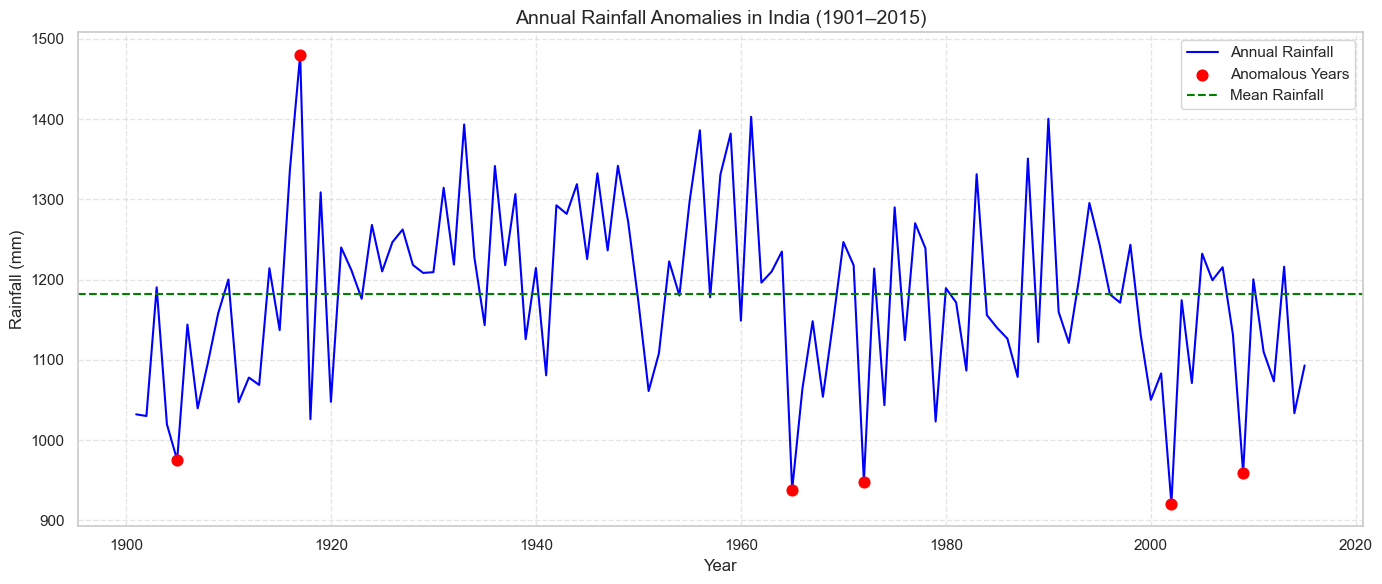

In [57]:
from sklearn.ensemble import IsolationForest

isolation_forest =IsolationForest(contamination =0.05,random_state=42)
rainfall_data['Annual_Anomaly']= isolation_forest.fit_predict(rainfall_data[['ANNUAL']])
anomalies = rainfall_data[rainfall_data['Annual_Anomaly']==-1]
normals = rainfall_data[rainfall_data['Annual_Anomaly']== 1]

plt.figure(figsize=(14,6))
sns.lineplot(x='YEAR',y='ANNUAL',data = rainfall_data,label='Annual Rainfall',color ='blue')
plt.scatter(anomalies['YEAR'],anomalies['ANNUAL'],color = 'red',s=60,label='Anomalous Years',zorder=5)
plt.axhline(y=rainfall_data['ANNUAL'].mean(),color='green',linestyle='--',label ='Mean Rainfall')
plt.title('Annual Rainfall Anomalies in India (1901–2015)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

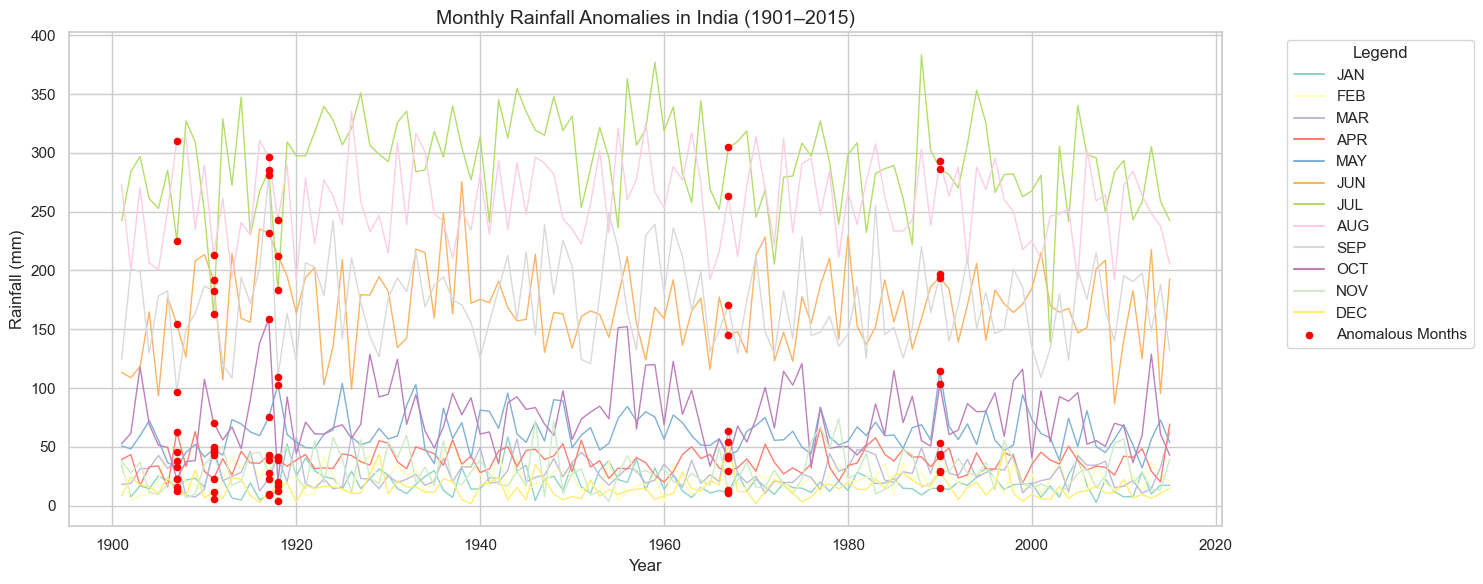

In [58]:
isolation_forest_monthly = IsolationForest(contamination=0.05, random_state=42)
monthly_data = rainfall_data[monthly_columns]
rainfall_data['Monthly_Anomaly'] = isolation_forest_monthly.fit_predict(monthly_data)

monthly_anomalies_df = rainfall_data[rainfall_data['Monthly_Anomaly'] == -1][['YEAR'] + monthly_columns]

monthly_anomalies = []
for column in monthly_columns:
    for _, row in monthly_anomalies_df.iterrows():
        monthly_anomalies.append({
            'Year': row['YEAR'],
            'Month': column,
            'Rainfall': row[column]
        })

monthly_anomalies_df_long = pd.DataFrame(monthly_anomalies)

monthly_long = pd.melt(
    rainfall_data, id_vars=['YEAR'], value_vars=monthly_columns,
    var_name='Month', value_name='Rainfall'
)
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_long, x='YEAR', y='Rainfall', hue='Month',
             palette='Set3', linewidth=1)

plt.scatter(
    monthly_anomalies_df_long['Year'],
    monthly_anomalies_df_long['Rainfall'],
    color='red', s=20, label='Anomalous Months', zorder=5
)
plt.title('Monthly Rainfall Anomalies in India (1901–2015)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legend')
plt.grid(True)
plt.tight_layout()
plt.show()

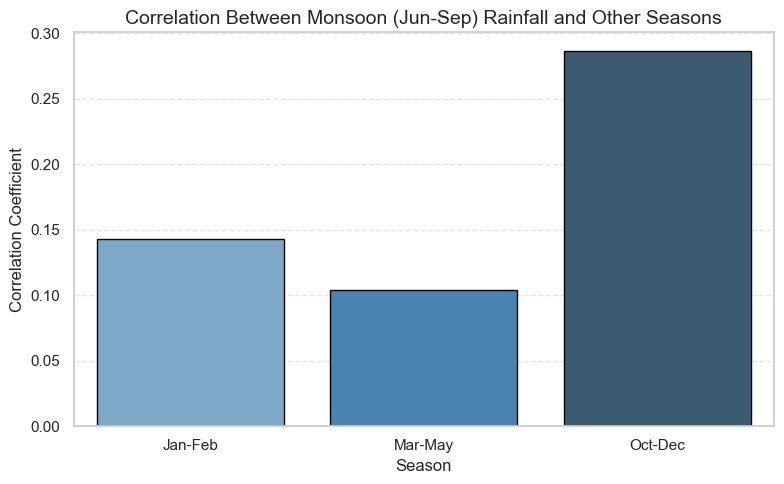

In [59]:
monsoon_column ='Jun-Sep'
relationship ={}
for season in seasonal_columns:
    if season!=monsoon_column:
        corr,_ = pearsonr(rainfall_data[monsoon_column],rainfall_data[season])
        relationship[season] = corr
correlation_data =pd.DataFrame({
    'Season':list(relationship.keys()),
    'Correlation Coefficient':list(relationship.values())
})
plt.figure(figsize=(8,5))
barplot = sns.barplot(
    data = correlation_data,x='Season',y='Correlation Coefficient',
    palette ='Blues_d',edgecolor ='black'
)

plt.title('Correlation Between Monsoon (Jun-Sep) Rainfall and Other Seasons', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Correlation Coefficient')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
        

In [67]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/1f/c1/b75fad123110f7e845feb4f2f9d64dd652ff9f44e9fcca5b09ef06ee4372/holidays-0.71-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/a4/ed/1f1afb2e9e7f38a545d628f864d562a5ae64fe6f7a10e28ffb9b185b4e89/importlib_resources-6.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed0

In [68]:
from prophet import Prophet

07:39:42 - cmdstanpy - INFO - Chain [1] start processing
07:39:43 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5044\3889000181.py:20: UserWarning:

The figure layout has changed to tight



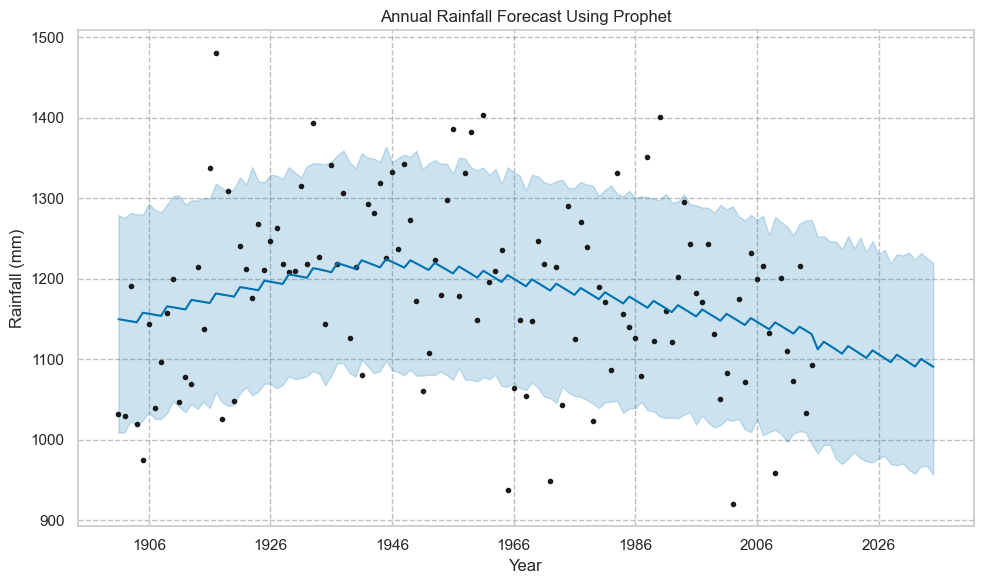

In [69]:
rainfall_data['DATE'] = pd.to_datetime(rainfall_data['YEAR'], format='%Y')
annual_rainfall_ts = rainfall_data.set_index('DATE')['ANNUAL']

# Prepare data for Prophet
prophet_data = annual_rainfall_ts.reset_index()
prophet_data.columns = ['ds', 'y']

# Initialize and train the model
model = Prophet()
model.fit(prophet_data)

# Create future dataframe (20 years into the future)
future = model.make_future_dataframe(periods=20, freq='Y')
forecast = model.predict(future)

# Plot the forecast using Matplotlib
fig = model.plot(forecast, xlabel='Year', ylabel='Rainfall (mm)')
plt.title('Annual Rainfall Forecast Using Prophet')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()